In [31]:
import pandas as pd
from statsmodels.tsa.stattools import coint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [20]:
SIZE = 1000

In [36]:
# Read in the data file 
df = pd.read_csv("all_prices.csv", parse_dates = ["time"])
start_date = '2022-01-01'  # extract the date from filename here
end_date = '2022-12-01'

# Get every row from the start date to the end data in 15 minute intervals
df = df[(df['time'] > start_date) & (df['time'] < end_date)]
df = df[df['time'].dt.minute % 15 == 0]
df.head()

,time,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
0,2022-01-01 08:00:00,47203.308183,3715.50000,148.10,26.249000,243.970000,0.84093,NaN
15,2022-01-01 08:15:00,47238.158052,3719.90000,148.57,26.257250,243.710000,0.84240,148.526667
30,2022-01-01 08:30:00,47275.000000,3722.30000,148.51,26.249000,243.275000,0.84149,148.270000
44,2022-01-01 08:45:00,47248.000000,3726.41216,148.24,26.247750,244.823333,0.84170,148.448750
59,2022-01-01 09:00:00,47160.000000,3724.80000,148.12,26.219625,244.387500,0.83961,147.772000


In [43]:
df = df.tail(SIZE)
df.head()

,time,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
456853,2022-11-16 00:15:00,16836.0,1247.7,57.865000,6.788867,128.463333,0.38418,40.666000
456868,2022-11-16 00:30:00,16804.0,1249.8,57.814000,6.761700,128.885000,0.38262,40.491000
456883,2022-11-16 00:45:00,16799.0,1251.5,57.816000,6.774800,128.860000,0.38346,40.662000
456898,2022-11-16 01:00:00,16781.0,1252.4,57.752000,6.763300,128.775000,0.38290,40.625333
456913,2022-11-16 01:15:00,16790.0,1255.8,58.228429,6.793533,129.013333,0.38259,40.696000


In [39]:
prices_df = df.drop("time", axis = 1)
prices_df.dropna(axis = 1, inplace = True)
prices_df.head()

,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
456853,16836.0,1247.7,57.865000,6.788867,128.463333,0.38418,40.666000
456868,16804.0,1249.8,57.814000,6.761700,128.885000,0.38262,40.491000
456883,16799.0,1251.5,57.816000,6.774800,128.860000,0.38346,40.662000
456898,16781.0,1252.4,57.752000,6.763300,128.775000,0.38290,40.625333
456913,16790.0,1255.8,58.228429,6.793533,129.013333,0.38259,40.696000


In [40]:
def engle_granger(ticker1, ticker2, threshold):
    """Returns true if we reject the null hypothesis and therefore there is cointegration"""
    test_result = coint(prices_df[ticker1], prices_df[ticker2])
    return test_result[1] <= threshold

In [41]:
cointegrated_pairs = []
for u, v in combinations(prices_df.columns, 2):
        # print(f"Testing {u} and {v}")
        if u != v:
            if (engle_granger(u, v, 0.20)):
                print(f"Found cointegrated pair: {u} and {v}")
                cointegrated_pairs.append((u, v))

Found cointegrated pair: btc_price and eth_price
Found cointegrated pair: neo_price and xmr_price
Found cointegrated pair: xmr_price and xrp_price
Found cointegrated pair: xmr_price and zec_price


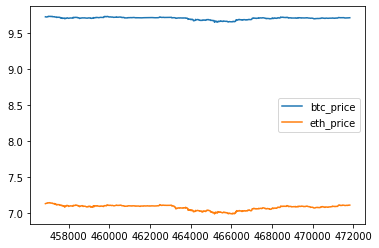

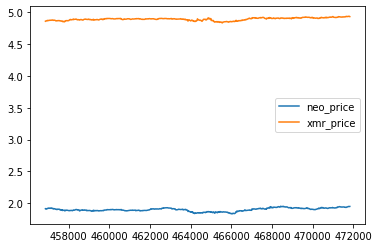

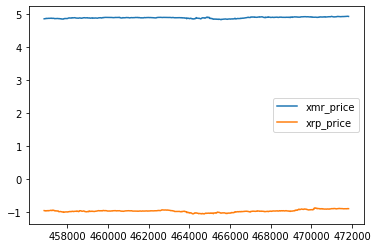

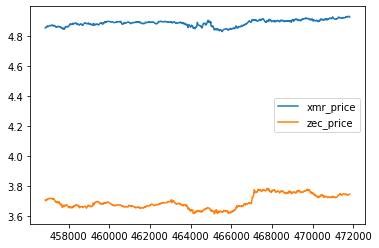

In [46]:
# Plot the cointegrated pairs
for pair in cointegrated_pairs:
    plt.figure(figsize = (6, 4))
    plt.plot(np.log(prices_df[pair[0]]), label = pair[0])
    plt.plot(np.log(prices_df[pair[1]]), label = pair[1])
    plt.legend()
    plt.show()
plt.show()